<a href="https://colab.research.google.com/github/ibbi-12/DynamicPriceOptimizer/blob/main/DynamicPriceOptimizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Imports**

In [8]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.optimize import minimize_scalar
import matplotlib.pyplot as plt

# **Generate Synthetic Historical Data**

In [9]:
np.random.seed(42)
prices = np.linspace(5,20,100)
noise = np.random.normal(0,5,size=prices.shape)
demand = 100 - 3 * prices + noise
data =pd.DataFrame({'Price':prices, 'Demand':demand})
print("Sample of Synthetic Data:")
print(data.head())

Sample of Synthetic Data:
      Price     Demand
0  5.000000  87.483571
1  5.151515  83.854133
2  5.303030  87.329352
3  5.454545  91.251513
4  5.606061  82.011051


## **Visualize the Synthetic Datation**

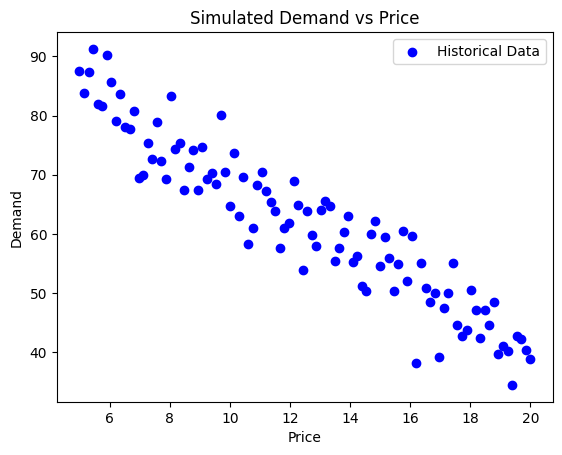

In [10]:
plt.scatter(data['Price'],data['Demand'],color='blue',label='Historical Data')
plt.xlabel('Price')
plt.ylabel('Demand')
plt.title('Simulated Demand vs Price')
plt.legend()
plt.show()

# **Build a Demand Forecasting Model**



In [11]:
model = LinearRegression()
model.fit(data[['Price']],data['Demand'])

LinearRegression()

# **Define the Revenue Function**

In [22]:
def revenue(Price):
  predicted_demand = model.predict(pd.DataFrame([[Price]],columns = ['Price']))[0]
  rev = Price * predicted_demand
  return -rev

# **Optimize Price to Maximize Revenue**

In [24]:
result = minimize_scalar(revenue ,bounds=(5,20),method='bounded')
optimal_price = result.x
optimal_revenue = -result.fun

print("Optimal Price: ${:.2f}".format(optimal_price))
print("Expected Revenue at Optimal Price: ${:.2f}".format(optimal_revenue))


Optimal Price: $16.74
Expected Revenue at Optimal Price: $827.89


# **Visualize the Revenue Function and Optimal Price**

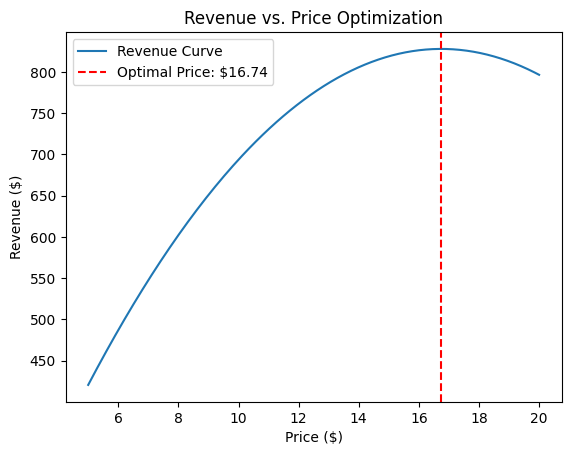

In [25]:
price_range = np.linspace(5, 20, 200)
revenue_values = [-revenue(p) for p in price_range]

plt.plot(price_range, revenue_values, label='Revenue Curve')
plt.axvline(optimal_price, color='red', linestyle='--', label=f'Optimal Price: ${optimal_price:.2f}')

plt.xlabel('Price ($)')
plt.ylabel('Revenue ($)')
plt.title('Revenue vs. Price Optimization')
plt.legend()
plt.show()
